In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
x = np.linspace(0,1, 1001)

In [3]:
t = .3

In [4]:
y = 5*t*(.2969*x**.5 - .126*x-.3516*x**2 + .2843*x**3 - .1015*x**4)

In [5]:
foil = pd.DataFrame({'x':x,'y':y})

In [6]:
number_of_dados = 12

In [7]:
n = len(x)//number_of_dados
xx = x[::n]
yy = y[::n]

(-0.06064229390681003,
 1.05664229390681,
 -0.16924233832841218,
 0.1652472376188942)

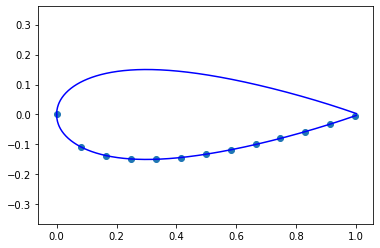

In [8]:
fig, ax = plt.subplots()
ax.plot(x,y, color = 'blue')
ax.plot(x,-y, color = 'blue')
plt.scatter(xx,-yy)
ax.axis('equal')

In [9]:
def max_thickness_over_range(row):
    f = foil[(row.left <= foil['x']) & (foil['x'] <= row.right)]
    return f['y'].max()
    

In [10]:
dado_plan = pd.DataFrame({'left':xx[:-1], 'right':xx[1:]})
dado_plan['thickness'] = dado_plan.apply(max_thickness_over_range, axis = 1)
T = .1
dado_plan['depth_of_cut'] = T - dado_plan['thickness']

In [11]:
dado_plan

,left,right,thickness,depth_of_cut
0,0.000,0.083,0.109220,-0.009220
1,0.083,0.166,0.137377,-0.037377
2,0.166,0.249,0.148467,-0.048467
3,0.249,0.332,0.150043,-0.050043
4,0.332,0.415,0.149484,-0.049484
5,0.415,0.498,0.143594,-0.043594
6,0.498,0.581,0.132665,-0.032665
7,0.581,0.664,0.117910,-0.017910
8,0.664,0.747,0.100124,-0.000124
9,0.747,0.830,0.079787,0.020213


In [12]:
cut_x = dado_plan[['left','right']].values.flatten()
cut_y = dado_plan[['thickness','thickness']].values.flatten()

(-0.05, 1.05, -0.1650474825834183, 0.1650474825834183)

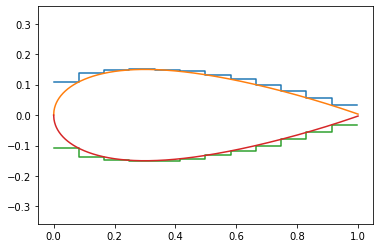

In [13]:
fig, ax = plt.subplots()

ax.plot(cut_x, cut_y)
ax.plot(x,y)
ax.plot(cut_x, -cut_y)
ax.plot(x,-y)
ax.axis('equal')